This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

1. Age: Age of the patient
2. Gender:  Gender of the patient
3. TB: Total Bilirubin
4. DB: Direct Bilirubin
5. Alkphos: Alkaline Phosphotase
6. Sgpt: Alamine Aminotransferase
7. Sgot: Aspartate Aminotransferase
8. TP: Total Protiens
9. ALB: Albumin
10. A/G Ratio: Albumin and Globulin Ratio
11. Classes: NP and LP (patient with liver disease, or no disease)

This dataset was downloaded from Kaggle.com


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

In [3]:
df.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.shape

(583, 11)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
tot_bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
direct_bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
tot_proteins,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
albumin,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
ag_ratio,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
sgpt,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
sgot,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
alkphos,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
is_patient,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


<AxesSubplot:xlabel='is_patient', ylabel='count'>

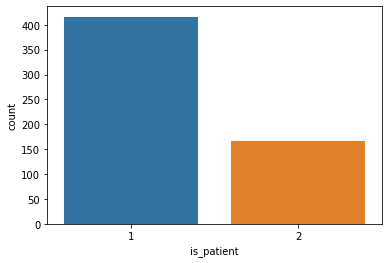

In [7]:
sns.countplot(x='is_patient',data=df)

<AxesSubplot:xlabel='direct_bilirubin', ylabel='Count'>

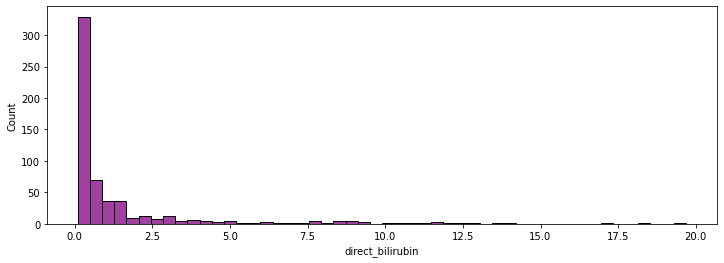

In [8]:
plt.figure(figsize=(12,4))
sns.histplot(df['direct_bilirubin'],bins=50,kde=False,color='purple')

In [9]:
df.corr()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
tot_bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
direct_bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
tot_proteins,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
albumin,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
ag_ratio,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
sgpt,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
sgot,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
alkphos,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
is_patient,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


<AxesSubplot:>

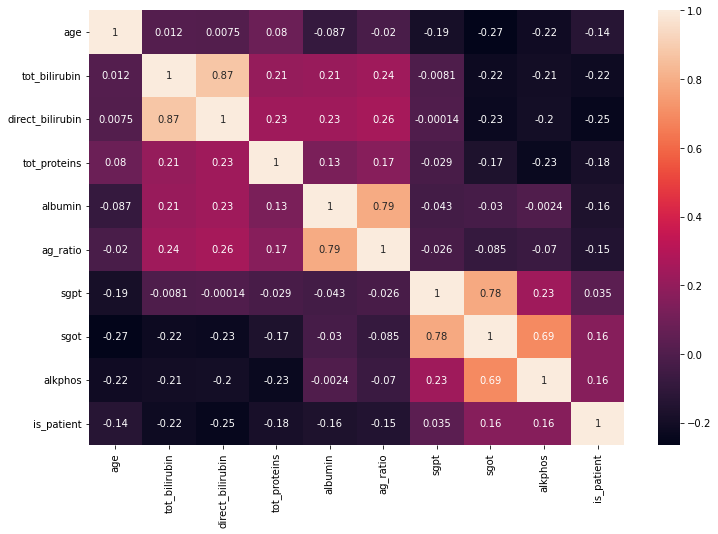

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

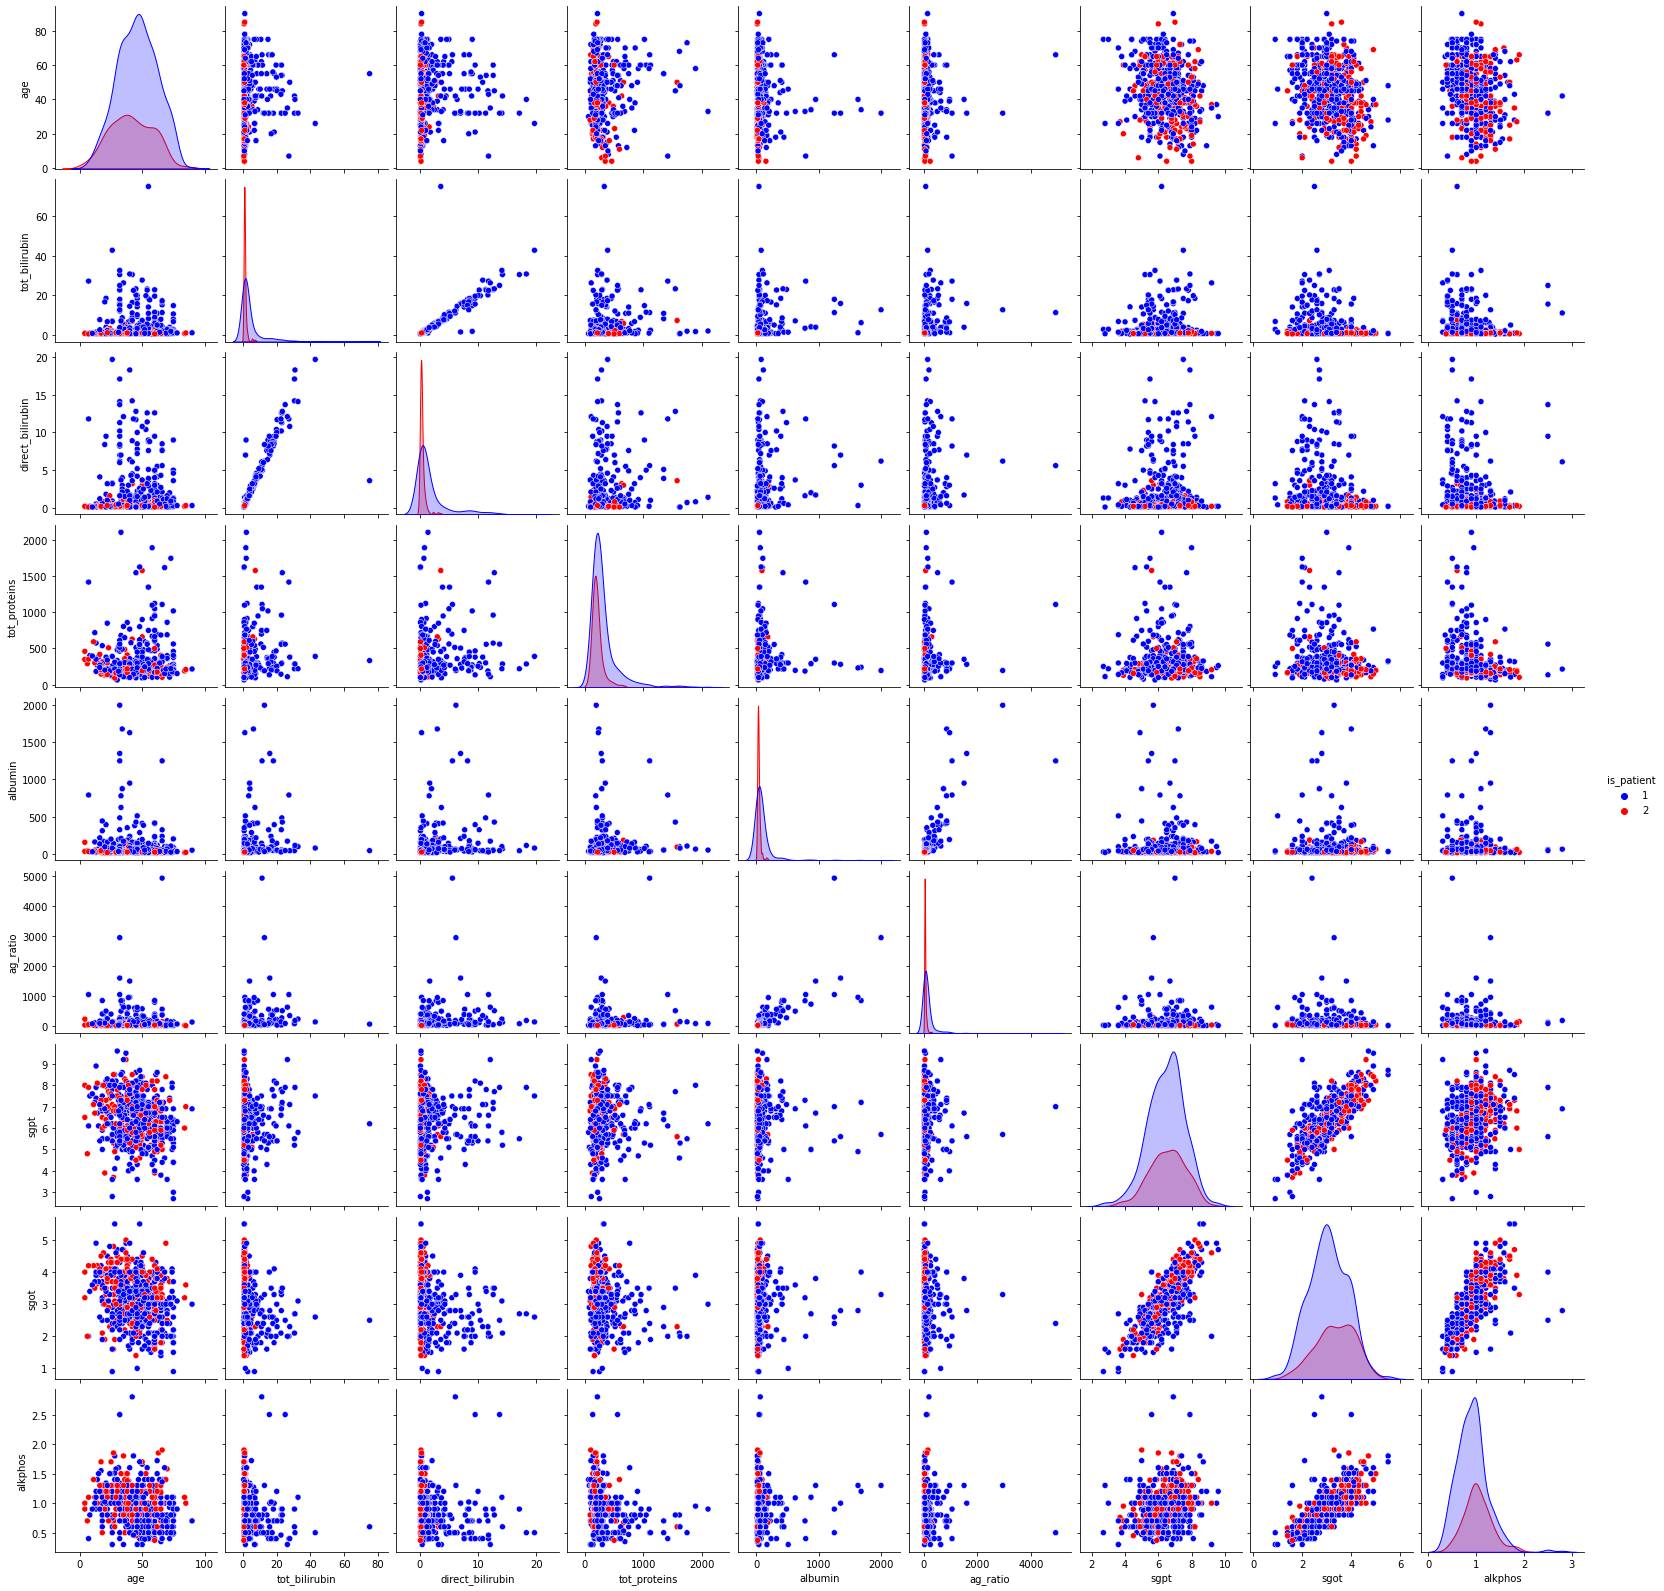

In [11]:
sns.pairplot(df,hue='is_patient',palette='bwr')

<AxesSubplot:xlabel='gender', ylabel='count'>

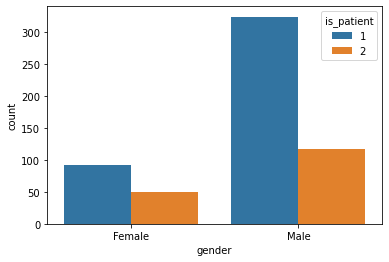

In [12]:
sns.countplot(x='gender',hue='is_patient',data=df)

In [13]:
df['gender'].value_counts()

Male      441
Female    142
Name: gender, dtype: int64

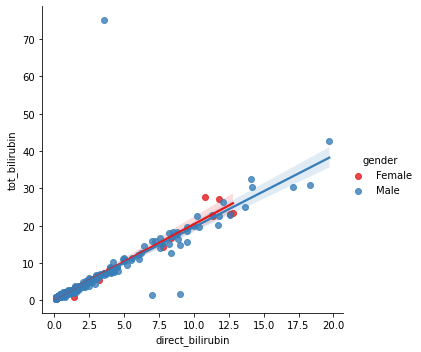

In [14]:
sns.lmplot(x="direct_bilirubin", y="tot_bilirubin", hue="gender",
               height=5, data=df,  palette="Set1")

# Data Preprocesing

In [15]:
df['gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)

In [16]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [17]:
df.isnull().sum()/len(df)*100

age                 0.000000
gender              0.000000
tot_bilirubin       0.000000
direct_bilirubin    0.000000
tot_proteins        0.000000
albumin             0.000000
ag_ratio            0.000000
sgpt                0.000000
sgot                0.000000
alkphos             0.686106
is_patient          0.000000
dtype: float64

In [18]:
df['alkphos'].fillna((df['alkphos'].mean()), inplace=True)

In [19]:
df['alkphos'].value_counts()

1.00    106
0.80     65
0.90     59
0.70     53
1.10     46
       ... 
1.39      1
0.53      1
1.03      1
0.68      1
0.37      1
Name: alkphos, Length: 70, dtype: int64

In [20]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [21]:
df.groupby('is_patient')['gender'].describe().transpose()

is_patient,1,2
count,416.000000,167.000000
mean,0.221154,0.299401
std,0.415524,0.459373
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [22]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [23]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

# Train_Test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('is_patient',axis=1).values
y = df['is_patient'].values

In [26]:
print(len(df))

583


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(X_train)

MinMaxScaler()

In [31]:
MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler()

In [32]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Creating

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping


In [34]:
X_train.shape

(408, 10)

In [96]:
model = Sequential()

#input
model.add(Dense(100,activation='relu',input_shape=[10]))
#model.add(Dropout(0.2))

#hidden
model.add(Dense(100,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))

#output
model.add(Dense(1))

# For a binary classification problem
#model.compile(loss='mae', optimizer='adam')
model.compile(loss='binary_crossentropy',metrics=['binary_accuracy'],optimizer='adam')

In [97]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test), 
          batch_size=256)

Epoch 1/500
2/2 [==============================] - 1s 275ms/step - loss: 6.3271 - binary_accuracy: 0.0000e+00 - val_loss: 2.4810 - val_binary_accuracy: 0.0000e+00
Epoch 2/500
2/2 [==============================] - 0s 43ms/step - loss: 2.3223 - binary_accuracy: 0.0000e+00 - val_loss: 1.7953 - val_binary_accuracy: 0.0000e+00
Epoch 3/500
2/2 [==============================] - 0s 57ms/step - loss: 1.7037 - binary_accuracy: 0.0000e+00 - val_loss: 1.3691 - val_binary_accuracy: 0.0057
Epoch 4/500
2/2 [==============================] - 0s 37ms/step - loss: 1.2950 - binary_accuracy: 0.0025 - val_loss: 1.0428 - val_binary_accuracy: 0.0743
Epoch 5/500
2/2 [==============================] - 0s 47ms/step - loss: 0.9785 - binary_accuracy: 0.0907 - val_loss: 0.7562 - val_binary_accuracy: 0.2857
Epoch 6/500
2/2 [==============================] - 0s 35ms/step - loss: 0.6924 - binary_accuracy: 0.3554 - val_loss: 0.4790 - val_binary_accuracy: 0.5714
Epoch 7/500
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 31ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 54/500
2/2 [==============================] - 0s 29ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 55/500
2/2 [==============================] - 0s 33ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 56/500
2/2 [==============================] - 0s 31ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 57/500
2/2 [==============================] - 0s 31ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 58/500
2/2 [==============================] - 0s 35ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 59/500
2/2 [==============================] - 0s 31ms/step - loss

2/2 [==============================] - 0s 32ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 106/500
2/2 [==============================] - 0s 34ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 107/500
2/2 [==============================] - 0s 33ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 108/500
2/2 [==============================] - 0s 37ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 109/500
2/2 [==============================] - 0s 36ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 110/500
2/2 [==============================] - 0s 33ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 111/500
2/2 [==============================] - 0s 31ms/step 

Epoch 157/500
2/2 [==============================] - 0s 46ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 158/500
2/2 [==============================] - 0s 30ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 159/500
2/2 [==============================] - 0s 41ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 160/500
2/2 [==============================] - 0s 43ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 161/500
2/2 [==============================] - 0s 41ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 162/500
2/2 [==============================] - 0s 46ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 163/500
2/2 [==============================] -

Epoch 209/500
2/2 [==============================] - 0s 39ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 210/500
2/2 [==============================] - 0s 37ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 211/500
2/2 [==============================] - 0s 37ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 212/500
2/2 [==============================] - 0s 37ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 213/500
2/2 [==============================] - 0s 32ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 214/500
2/2 [==============================] - 0s 34ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 215/500
2/2 [==============================] -

Epoch 261/500
2/2 [==============================] - 0s 34ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 262/500
2/2 [==============================] - 0s 43ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 263/500
2/2 [==============================] - 0s 34ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 264/500
2/2 [==============================] - 0s 32ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 265/500
2/2 [==============================] - 0s 35ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 266/500
2/2 [==============================] - 0s 48ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 267/500
2/2 [==============================] -

Epoch 313/500
2/2 [==============================] - 0s 36ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 314/500
2/2 [==============================] - 0s 36ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 315/500
2/2 [==============================] - 0s 32ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 316/500
2/2 [==============================] - 0s 37ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 317/500
2/2 [==============================] - 0s 31ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 318/500
2/2 [==============================] - 0s 34ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 319/500
2/2 [==============================] -

Epoch 365/500
2/2 [==============================] - 0s 35ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 366/500
2/2 [==============================] - 0s 33ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 367/500
2/2 [==============================] - 0s 33ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 368/500
2/2 [==============================] - 0s 29ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 369/500
2/2 [==============================] - 0s 31ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 370/500
2/2 [==============================] - 0s 39ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 371/500
2/2 [==============================] -

Epoch 417/500
2/2 [==============================] - 0s 45ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 418/500
2/2 [==============================] - 0s 30ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 419/500
2/2 [==============================] - 0s 39ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 420/500
2/2 [==============================] - 0s 46ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 421/500
2/2 [==============================] - 0s 52ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 422/500
2/2 [==============================] - 0s 50ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 423/500
2/2 [==============================] -

Epoch 469/500
2/2 [==============================] - 0s 34ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 470/500
2/2 [==============================] - 0s 51ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 471/500
2/2 [==============================] - 0s 37ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 472/500
2/2 [==============================] - 0s 41ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 473/500
2/2 [==============================] - 0s 53ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 474/500
2/2 [==============================] - 0s 47ms/step - loss: -4.3356 - binary_accuracy: 0.7157 - val_loss: -4.4441 - val_binary_accuracy: 0.7086
Epoch 475/500
2/2 [==============================] -

In [158]:
loss = pd.DataFrame(model.history.history)

In [159]:
loss[['loss','val_loss']].plot(title="Cross-entropy")
loss[['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
print("Minimum validation loss: {}".format(loss['val_loss'].min()))
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(loss['val_loss'].min(), 
              loss['val_binary_accuracy'].max()))

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

In [123]:
from sklearn.metrics import classification_report,confusion_matrix

In [124]:
predictions = model.predict(X_test)
 
for i in range(len(predictions)):
    predictions[i][0] = int(round(predictions[i][0]))

In [125]:
print(classification_report(y_test,predictions,zero_division=1))

              precision    recall  f1-score   support

         1.0       0.62      0.04      0.08       124
         2.0       0.28      0.73      0.40        51
         3.0       0.00      1.00      0.00         0

    accuracy                           0.24       175
   macro avg       0.30      0.59      0.16       175
weighted avg       0.52      0.24      0.17       175



In [126]:
print(confusion_matrix(y_test, predictions))

[[ 5 95 24]
 [ 3 37 11]
 [ 0  0  0]]


In [127]:
# Setup plotting
import matplotlib.pyplot as plt
from learntools.deep_learning_intro.dltools import animate_sgd
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex3 import *

In [128]:
learning_rate = 0.3
batch_size = 100
num_examples = 583

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

# Early_|Stop

In [149]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=100, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [150]:
model = Sequential()

#input
model.add(Dense(100,activation='relu',input_shape=[10]))
#model.add(Dropout(0.2))

#hidden
model.add(Dense(100,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))

#output
model.add(Dense(1))

# For a binary classification problem
#model.compile(loss='mae', optimizer='adam')
model.compile(loss='binary_crossentropy',metrics=['binary_accuracy'],optimizer='adam')

In [151]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          callbacks=[early_stopping],
          verbose=0,
          validation_data=(X_test, y_test), 
          batch_size=256)

In [152]:
loss = pd.DataFrame(model.history.history)

Minimum validation loss: -4.444063663482666
Best Validation Loss: -4.4441
Best Validation Accuracy: 0.7086


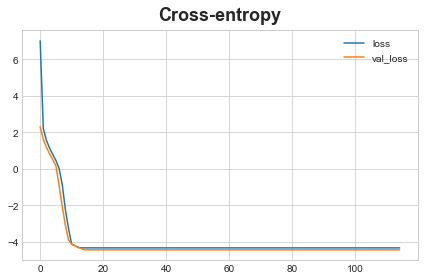

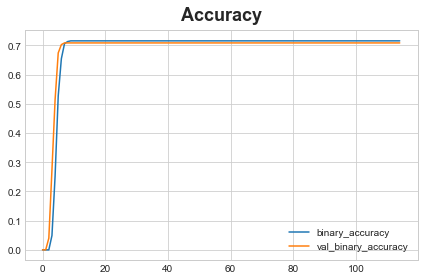

In [153]:
loss[['loss','val_loss']].plot(title="Cross-entropy")
loss[['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
print("Minimum validation loss: {}".format(loss['val_loss'].min()))
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(loss['val_loss'].min(), 
              loss['val_binary_accuracy'].max()))

In [154]:
from sklearn.metrics import classification_report,confusion_matrix

In [155]:
predictions = model.predict(X_test)
 
for i in range(len(predictions)):
    predictions[i][0] = int(round(predictions[i][0]))

In [156]:
print(classification_report(y_test,predictions,zero_division=1))

              precision    recall  f1-score   support

         1.0       0.50      0.03      0.06       124
         2.0       0.27      0.63      0.38        51
         3.0       0.00      1.00      0.00         0

    accuracy                           0.21       175
   macro avg       0.26      0.55      0.15       175
weighted avg       0.43      0.21      0.15       175



In [157]:
print(confusion_matrix(y_test, predictions))

[[ 4 85 35]
 [ 4 32 15]
 [ 0  0  0]]
